In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv("../data/titanic/train.csv")
test = pd.read_csv("../data/titanic/test.csv")

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

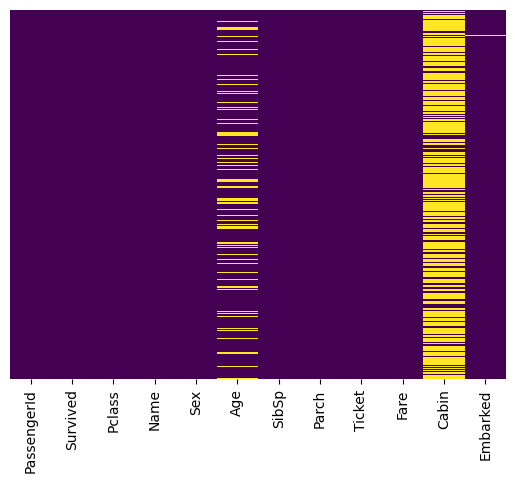

In [17]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [24]:

sns.set_style("whitegrid")
plt.style.use("dark_background")

<Axes: xlabel='Survived', ylabel='count'>

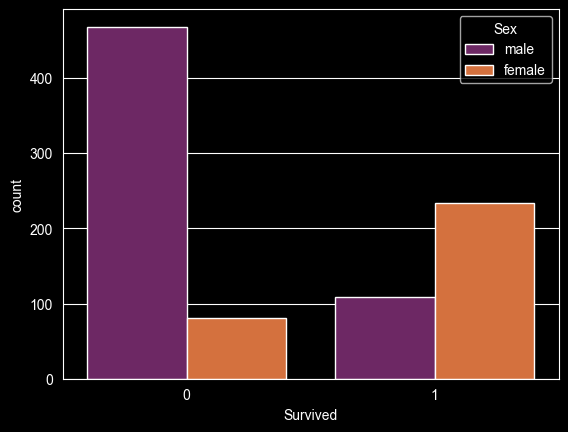

In [42]:
sns.countplot(x="Survived", data=train, hue='Sex', palette='inferno')

<Axes: xlabel='Survived', ylabel='count'>

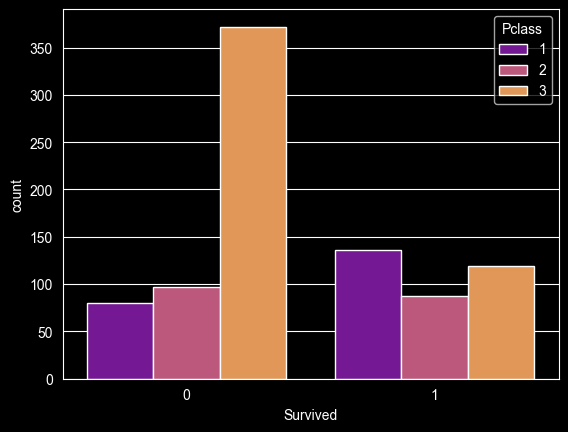

In [43]:
sns.countplot(x="Survived", data=train, hue='Pclass', palette='plasma')

<Axes: >

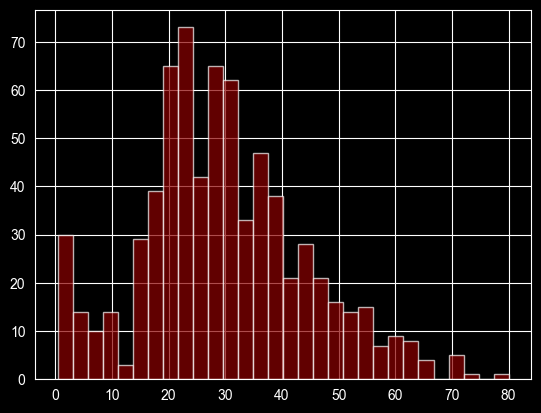

In [47]:
train.Age.hist(bins=30, color='darkred', alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

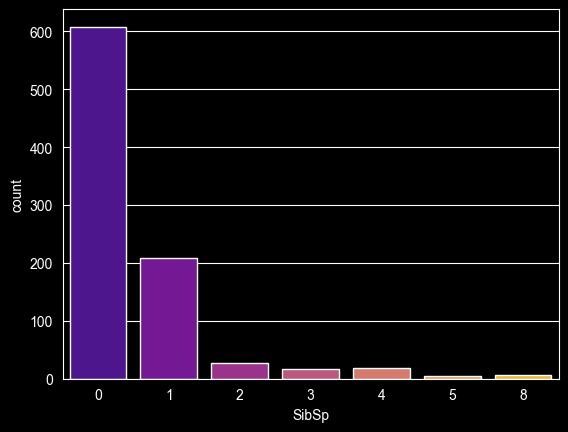

In [50]:
sns.countplot(x='SibSp', data=train, palette='plasma')

<Axes: >

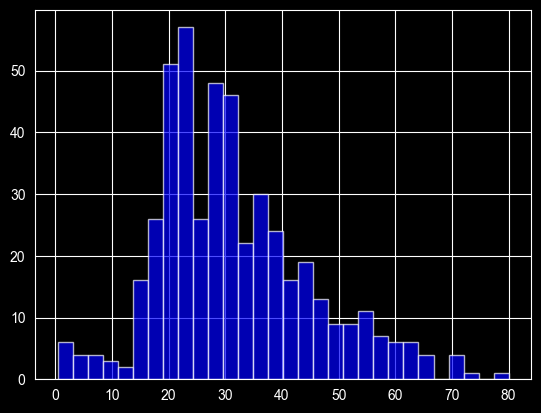

In [57]:
train[train['SibSp'] == 0]['Age'].hist(bins=30, color='blue', alpha=0.7)

<Axes: xlabel='Pclass', ylabel='Age'>

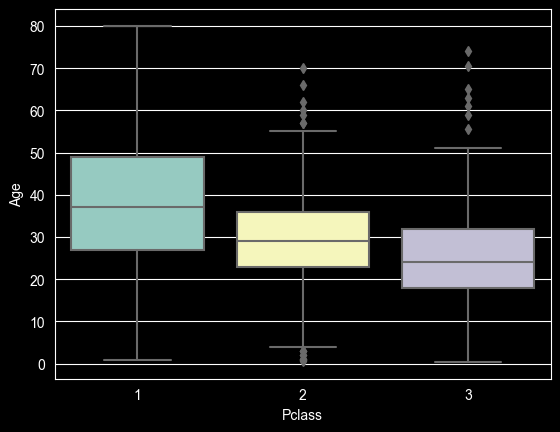

In [63]:
#Preencher as idades com a media das classes
sns.boxplot(x="Pclass", y='Age', data=train)

In [64]:
#tratando os dados faltantes

def transform_age(cols):
    age = cols[0]
    classe = cols[1]

    if pd.isnull(age):
        if classe == 1:
            return 37
        elif classe == 2:
            return 29
        else:
            return 24
    return age

train['Age'] = train[['Age', 'Pclass']].apply(transform_age, axis=1)
train['Age'].isnull().sum()
train.drop('Cabin', axis=1, inplace=True)
train.dropna(inplace=True)

In [86]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [92]:
train.drop(["Name", "PassengerId", "Ticket"], axis=1, inplace=True)

In [94]:
train = pd.concat([train, sex, embarked], axis=1)

In [96]:
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [101]:
x_train, x_test, y_train, y_test = train_test_split(
    train.drop("Survived", axis=1),
    train['Survived'], 
    test_size=0.3,
    random_state=42
)

In [103]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

c:\Users\eduardo.guimaraes\Documents\rede_neural\rede-nerural\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
predict = log_model.predict(x_test)

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
# [TP | FN]
# [FP | TN]

confusion_matrix(predict, y_test)

array([[138,  25],
       [ 29,  75]], dtype=int64)

In [111]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267

